Usage example of MediaPipe Pose Solution API in Python (see also http://solutions.mediapipe.dev/pose).

In [1]:
!pip install mediapipe

     |████████████████████████████████| 32.7 MB 25.3 MB/s 


Upload any image that that has a person. We take two example images from the web: https://unsplash.com/photos/v4zceVZ5HK8 and https://unsplash.com/photos/e_rhazQLaSs.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving plank_crop.mp4 to plank_crop.mp4


In [3]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Pose solution, we can access this module as `mp_pose = mp.solutions.pose`.

You may change the parameters, such as `static_image_mode` and `min_detection_confidence`, during the initialization. Run `help(mp_pose.Pose)` to get more informations about the parameters.

In [4]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles


In [5]:
# Run MediaPipe Pose and draw pose landmarks.
def get_key_landmarks(frame):
  with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
    # results = pose.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    try:
      results = pose.process(frame)
      left_shoulder = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].z)
      right_shoulder = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].z)
      right_hip = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].z)
      left_hip = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].z)
      right_heel = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].z)
      left_heel = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].z)
      right_feet = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].z)
      left_feet = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].z)
      left_elbow = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].z)
      right_elbow = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].z)
      left_wrist = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].z)
      right_wrist = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].z)
      left_knee = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].z)
      right_knee = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].z)
      return {'l_shoulder':left_shoulder, 'r_shoulder': right_shoulder, 'l_hip': left_hip, 'r_hip': right_hip, 'l_heel': left_heel, 
          'r_heel': right_heel, 'r_foot': right_feet, 'l_foot': left_feet, 'l_elbow' : left_elbow, 
          'r_elbow' : right_elbow, 'l_wrist' : left_wrist, 'r_wrist' : right_wrist, 'l_knee' : left_knee, 'r_knee' : right_knee}
    except:
      return -1
  

## Plank

In [6]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [7]:
cap = cv2.VideoCapture("plank_crop.mp4")

imgs, frames = [], []
count = 0
total_frames = 0
if cap.isOpened():
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    res=(int(width), int(height))

    frame = None
    while True:
        total_frames += 1
        try:
            is_success, frame = cap.read()
        except cv2.error:
            continue
        
        clear_output(wait=True)
        if not is_success:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        lnd = get_key_landmarks(image)
        if lnd != -1:
          imgs.append(image)
          frames.append(lnd)
        #plt.imshow(image); plt.show()
        count += 15
        cap.set(cv2.CAP_PROP_POS_FRAMES, count)

print(frames)
cap.release()

[{'l_shoulder': (0.25931692123413086, 0.3019018769264221, -0.11288869380950928), 'r_shoulder': (0.3070504665374756, 0.3111572861671448, 0.2262517809867859), 'l_hip': (0.4914260506629944, 0.3384443521499634, -0.10021688789129257), 'r_hip': (0.5041155219078064, 0.37057995796203613, 0.10007397830486298), 'l_heel': (0.9528163075447083, 0.593077540397644, -0.12066224962472916), 'r_heel': (0.9384356737136841, 0.5952784419059753, 0.07954604178667068), 'r_foot': (0.8831936120986938, 0.8446246385574341, -0.011530076153576374), 'l_foot': (0.8979493975639343, 0.8630368113517761, -0.24453163146972656), 'l_elbow': (0.283927857875824, 0.8021436929702759, -0.18310528993606567), 'r_elbow': (0.3250115215778351, 0.7614268064498901, 0.21470023691654205), 'l_wrist': (0.17146733403205872, 0.8014938831329346, -0.1866799145936966), 'r_wrist': (0.20611470937728882, 0.7765709161758423, 0.12824606895446777), 'l_knee': (0.7011365294456482, 0.5289187431335449, -0.08762352913618088), 'r_knee': (0.6997242569923401,

In [8]:
len(frames)

59

In [9]:
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image, title=None):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.title(title)
  plt.axis(False)
  plt.imshow(img); plt.show()

def show_marks(image, title=None):
  # Run MediaPipe Pose and draw pose landmarks.
  with mp_pose.Pose(
      static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    # results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    results = pose.process(image)
    # Print nose landmark.
    image_hight, image_width, _ = image.shape

    # Draw pose landmarks.
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    resize_and_show(annotated_image, title=title)

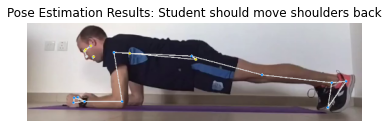

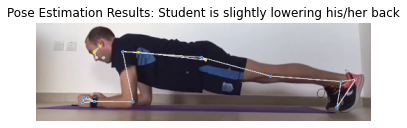

In [27]:
topFrame, topIdx = frames[0], 0
switchFrame, switchIdx = [], []
used = set()
for i, frame in enumerate(frames):
  diff = frames[i]["r_shoulder"][0] - frames[i]["r_elbow"][0]
  if diff < -0.012 and 'Student should move shoulders back' not in used:
    message = 'Student should move shoulders back'
  if diff > 0.012 and 'Student should move shoulders forward' not in used:
    message = 'Student should move shoulders forward'
  hip_to_shoulder = frames[i]["r_hip"][0] - frames[i]["r_shoulder"][0]
  if hip_to_shoulder < -0.01 and 'Student is raising his/her back too high' not in used:
    message = 'Student is raising his/her back too high'
  if 0.4 > hip_to_shoulder > 0.2 and 'Student is slightly lowering his/her back' not in used:
    message = 'Student is slightly lowering his/her back'
  if hip_to_shoulder > 0.4 and 'Student is lowering his/her back too much' not in used:
    message = 'Student is lowering his/her back too much'
  if message not in used:
    used.add(message)
    show_marks(imgs[i], title=f'Pose Estimation Results: {message}')